# Logistic Regression

이 연습에서는 로지스틱 회귀를 구현하고 이를 두 개의 서로 다른 데이터 세트에 적용합니다.


# Outline
- [ 1 - Packages ](#1)
- [ 2 - Logistic Regression](#2)
  - [ 2.1 Problem Statement](#2.1)
  - [ 2.2 Loading and visualizing the data](#2.2)
  - [ 2.3  Sigmoid function](#2.3)
  - [ 2.4 Cost function for logistic regression](#2.4)
  - [ 2.5 Gradient for logistic regression](#2.5)
  - [ 2.6 Learning parameters using gradient descent ](#2.6)
  - [ 2.7 Plotting the decision boundary](#2.7)
  - [ 2.8 Evaluating logistic regression](#2.8)
- [ 3 - Regularized Logistic Regression](#3)
  - [ 3.1 Problem Statement](#3.1)
  - [ 3.2 Loading and visualizing the data](#3.2)
  - [ 3.3 Feature mapping](#3.3)
  - [ 3.4 Cost function for regularized logistic regression](#3.4)
  - [ 3.5 Gradient for regularized logistic regression](#3.5)
  - [ 3.6 Learning parameters using gradient descent](#3.6)
  - [ 3.7 Plotting the decision boundary](#3.7)
  - [ 3.8 Evaluating regularized logistic regression model](#3.8)


<a name="1"></a>
## 1 - Packages 

먼저 아래 셀을 실행하여 이 과제 중에 필요한 모든 패키지를 가져오겠습니다.
- [numpy](www.numpy.org)는 Python을 사용한 과학 컴퓨팅을 위한 기본 패키지입니다.
- [matplotlib](http://matplotlib.org)는 Python에서 그래프를 그리는 유명한 라이브러리입니다.
- ``utils.py``에는 이 할당을 위한 도우미 함수들이 포함되어 있습니다. 이 파일의 코드를 수정할 필요는 없습니다.

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *
import copy
import math
from public_tests import compute_cost_test
%matplotlib inline

<a name="2"></a>
## 2 - Logistic Regression

이 연습 부분에서는 학생의 대학 입학 여부를 예측하는 로지스틱 회귀 모델을 구축합니다.

<a name="2.1"></a>
### 2.1 Problem Statement

당신이 대학 학과의 행정관이고 두 가지 시험 결과를 바탕으로 각 지원자의 입학 가능성을 결정한다고 가정해 보겠습니다.
* 로지스틱 회귀를 위한 훈련 세트로 사용할 수 있는 이전 지원자의 과거 데이터가 있습니다.
* 각 훈련 사례에는 지원자의 두 가지 시험 점수와 입학 결정이 있습니다.
* 귀하의 임무는 두 시험의 점수를 기반으로 지원자의 합격 확률을 추정하는 분류 모델을 구축하는 것입니다.

<a name="2.2"></a>
### 2.2 Loading and visualizing the data

이 작업에 대한 데이터 세트를 로드하는 것부터 시작합니다.
- 아래 표시된 `load_dataset()` 함수는 데이터를 `X_train` 및 `y_train` 변수에 로드합니다.
   - `X_train`에는 학생의 두 가지 시험에 대한 시험 점수가 포함되어 있습니다.
   - `y_train`은 입학 결정입니다.
       - 학생이 입학한 경우 `y_train = 1`
       - 학생이 입학하지 못한 경우 `y_train = 0`
   - `X_train`과 `y_train`은 모두 numpy 배열입니다.

In [21]:
# load dataset
X_train, y_train = load_data("data/ex2data1.txt")

#### View the variables
데이터세트에 대해 좀 더 알아봅시다.
- 시작하기 좋은 곳은 각 변수를 프린트하고 그 내용을 확인하는 것입니다.

아래 코드는 `X_train`의 처음 5개 값과 변수 유형을 프린트합니다.

In [22]:
print("First five elements in X_train are:\n", X_train[:5])
print("Type of X_train:",type(X_train))

First five elements in X_train are:
 [[34.62365962 78.02469282]
 [30.28671077 43.89499752]
 [35.84740877 72.90219803]
 [60.18259939 86.3085521 ]
 [79.03273605 75.34437644]]
Type of X_train: <class 'numpy.ndarray'>


이제 `y_train`의 처음 5개 값을 프린트합니다.

In [23]:
print("First five elements in y_train are:\n", y_train[:5])
print("Type of y_train:",type(y_train))

First five elements in y_train are:
 [0. 0. 0. 1. 1.]
Type of y_train: <class 'numpy.ndarray'>


#### Check the dimensions of your variables

데이터에 익숙해지는 또 다른 유용한 방법은 해당 차원을 보는 것입니다.  `X_train`과 `y_train`의 모양을 인쇄하고 데이터 세트에 얼마나 많은 훈련 예제가 있는지 살펴보겠습니다.

In [24]:
print ('The shape of X_train is: ' + str(X_train.shape))
print ('The shape of y_train is: ' + str(y_train.shape))
print ('We have m = %d training examples' % (len(y_train)))

The shape of X_train is: (100, 2)
The shape of y_train is: (100,)
We have m = 100 training examples


#### Visualize your data

학습 알고리즘 구현을 시작하기 전에 가능하면 항상 데이터를 시각화하는 것이 좋습니다.
- 아래 코드는 2D 플롯(아래 참조)에 데이터를 표시합니다. 여기서 축은 두 개의 시험 점수이고 긍정적인 예와 부정적인 예는 서로 다른 마커로 표시됩니다.
- 이 플롯을 생성하기 위해 ``utils.py`` 파일의 도우미 함수를 사용합니다.

<img src="images/figure 1.png" width="450" height="450">



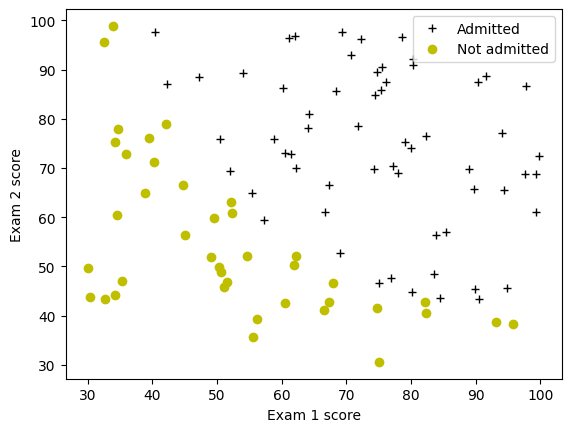

In [25]:
# Plot examples
plot_data(X_train, y_train[:], pos_label="Admitted", neg_label="Not admitted")

# Set the y-axis label
plt.ylabel('Exam 2 score') 
# Set the x-axis label
plt.xlabel('Exam 1 score') 
plt.legend(loc="upper right")
plt.show()

Your goal is to build a logistic regression model to fit this data.
- With this model, you can then predict if a new student will be admitted based on their scores on the two exams.

<a name="2.3"></a>
### 2.3  Sigmoid function

로지스틱 회귀의 경우 모델은 다음과 같이 표현됩니다.

$$ f_{\mathbf{w},b}(x) = g(\mathbf{w}\cdot \mathbf{x} + b)$$
여기서 $g$ 함수는 시그모이드 함수입니다. 시그모이드 함수는 다음과 같이 정의됩니다.

$$g(z) = \frac{1}{1+e^{-z}}$$

이 과제의 나머지 부분에서 사용할 수 있도록 먼저 시그모이드 함수를 구현해 보겠습니다.

<a name='ex-01'></a>
### Exercise 1
계산하려면 '시그모이드' 함수를 완성하세요.

$$g(z) = \frac{1}{1+e^{-z}}$$

참고하세요
- `z`는 항상 단일 숫자가 아닌, 숫자의 배열일 수도 있습니다.
- 입력이 숫자 배열인 경우 입력 배열의 각 값에 시그모이드 함수를 적용하고 싶습니다.

문제가 발생하면 아래 셀 뒤에 표시되는 힌트를 확인하여 구현에 도움을 받을 수 있습니다.

In [26]:
# UNQ_C1
# GRADED FUNCTION: sigmoid

def sigmoid(z):
    """
    Compute the sigmoid of z

    Args:
        z (ndarray): A scalar, numpy array of any size.

    Returns:
        g (ndarray): sigmoid(z), with the same shape as z
         
    """
          
    ### START CODE HERE ### 
    g=1/(1+np.exp(-z))
    ### END SOLUTION ###  
    
    return g

<details>
  <summary><font size="3" color="darkgreen"><b>Click for hints</b></font></summary>
       
`numpy`에는 [`np.exp()`](https://numpy.org/doc/stable/reference/generated/numpy.exp.html)라는 함수가 있는데, 이 함수는 입력 배열(`z`)에 있는 모든 요소의 지수( $e^{z}$)를 계산하는 편리한 방법을 제공합니다.
<details>
          <summary><font size="2" color="darkblue"><b> Click for more hints</b></font></summary>
        
   - $e^{-z}$를 `np.exp(-z)`라는 코드로 변환할 수 있습니다.
    
   - $1/e^{-z}$를 `1/np.exp(-z)`라는 코드로 변환할 수 있습니다.
    
     그래도 문제가 해결되지 않으면 아래에 제시된 힌트를 확인하여 `g` 계산 방법을 알아보세요.
    
    <details>
          <summary><font size="2" color="darkblue"><b>Hint to calculate g</b></font></summary>
        <code>g = 1 / (1 + np.exp(-z))</code>
    </details>


</details>

완료되면 아래 셀에서 `sigmoid(x)`를 호출하여 몇 가지 값을 테스트해 보세요.
- x의 큰 양수 값의 경우 시그모이드는 1에 가까워야 하고, 큰 음수 값의 경우 시그모이드는 0에 가까워야 합니다.
- `sigmoid(0)`을 평가하면 정확히 0.5가 나와야 합니다.

In [27]:
print ("sigmoid(0) = " + str(sigmoid(0)))

sigmoid(0) = 0.5


**Expected Output**:
<table>
  <tr>
    <td> <b>sigmoid(0)<b></td>
    <td> 0.5 </td> 
  </tr>
</table>
    
- 앞서 언급했듯이 코드는 벡터 및 행렬에서도 작동해야 합니다. 행렬의 경우 함수는 모든 요소에 대해 시그모이드 함수를 수행해야 합니다.

In [28]:
print ("sigmoid([ -1, 0, 1, 2]) = " + str(sigmoid(np.array([-1, 0, 1, 2]))))

# UNIT TESTS
from public_tests import *
sigmoid_test(sigmoid)

sigmoid([ -1, 0, 1, 2]) = [0.26894142 0.5        0.73105858 0.88079708]
All tests passed!


**Expected Output**:
<table>
  <tr>
    <td><b>sigmoid([-1, 0, 1, 2])<b></td> 
    <td>[0.26894142        0.5           0.73105858        0.88079708]</td> 
  </tr>    
  
</table>

<a name="2.4"></a>
### 2.4 Cost function for logistic regression

이 섹션에서는 로지스틱 회귀에 대한 비용 함수를 구현합니다.

<a name='ex-02'></a>
### Exercise 2

아래 방정식을 사용하여 `compute_cost` 함수를 완성하세요.

로지스틱 회귀의 경우 비용 함수는 다음과 같은 형식입니다.

$$ J(\mathbf{w},b) = \frac{1}{m}\sum_{i=0}^{m-1} \left[ loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) \right] \tag{1}$$

여기에서
* m 은 데이터세트의 훈련 예시 수입니다.

* $loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)})$는 단일 데이터 포인트에 대한 비용이며, 다음과 같습니다.

    $$loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = (-y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \tag{2}$$
    
    
*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$는 모델의 예측이고 $y^{(i)}$는 실제 레이블입니다.

* $f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(\mathbf{w} \cdot \mathbf{x^{(i)}} + b)$ 여기서 $g$ 함수는 시그모이드 함수입니다.
     * $f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(z_{\mathbf{w},b}(\mathbf{x}^{(i)}))$를 계산하기에 앞서서, 먼저 중간 변수 $z_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x^{( i)}} + b = w_0x^{(i)}_0 + ... + w_{n-1}x^{(i)}_{n-1} + b$를 계산하는 것이 도움이 될겁니다. 여기서 $n$는 특징의 수입니다. 
   
Note:
* 이 작업을 수행하면서 변수 `X_train`과 `y_train`은 스칼라 값이 아니라 각각 ($m, n$) 및 ($𝑚$,1) 모양의 행렬이라는 점을 기억하세요. 여기서 $𝑛$는 숫자입니다. 특징의 수이고 $𝑚$는 학습 예제의 수입니다.
* 이 부분은 위에서 구현한 시그모이드 함수를 사용하시면 됩니다.

문제가 발생하면 아래 셀 뒤에 표시되는 힌트를 확인하여 구현에 도움을 받을 수 있습니다.


In [33]:
# UNQ_C2
# GRADED FUNCTION: compute_cost
def compute_cost(X, y, w, b, lambda_= 1):
    """
    Computes the cost over all examples
    Args:
      X : (ndarray Shape (m,n)) data, m examples by n features
      y : (array_like Shape (m,)) target value 
      w : (array_like Shape (n,)) Values of parameters of the model      
      b : scalar Values of bias parameter of the model
      lambda_: unused placeholder
    Returns:
      total_cost: (scalar)         cost 
    """

    m, n = X.shape
    
    ### START CODE HERE ###
    cost = 0
    for i in range(m):
        z = np.dot(X[i],w) + b
        f_wb = sigmoid(z)
        cost += -y[i]*np.log(f_wb) - (1-y[i])*np.log(1-f_wb)
    total_cost = cost/m
    ### END CODE HERE ### 

    return total_cost

<details>
  <summary><font size="3" color="darkgreen"><b>Click for hints</b></font></summary>
    
    
   * 다음과 같이 코드에서 $h = \sum\limits_{i = 0}^{m-1} 2i$와 같은 합계 연산자를 나타낼 수 있습니다.:
    ```python 
        h = 0
        for i in range(m):
            h = h + 2*i
    ```
  
   * 이 경우 for 루프를 사용하여 'X'의 모든 예제를 반복하고 각 반복의 'loss'를 루프 외부에서 초기화된 변수('loss_sum')에 추가할 수 있습니다.
    
   * 그런 다음 'total_cost'를 'loss_sum'을 'm'으로 나눈 값으로 반환할 수 있습니다.
     
    <details>
          <summary><font size="2" color="darkblue"><b> Click for more hints</b></font></summary>
        
    * 이 함수의 전체 구현을 구성하는 방법은 다음과 같습니다.
    ```python 
    def compute_cost(X, y, w, b, lambda_= 1):
        m, n = X.shape
    
        ### START CODE HERE ###
        loss_sum = 0 
        
        # Loop over each training example
        for i in range(m): 
            
            # First calculate z_wb = w[0]*X[i][0]+...+w[n-1]*X[i][n-1]+b
            z_wb = 0 
            # Loop over each feature
            for j in range(n): 
                # Add the corresponding term to z_wb
                z_wb_ij = # Your code here to calculate w[j] * X[i][j]
                z_wb += z_wb_ij # equivalent to z_wb = z_wb + z_wb_ij
            # Add the bias term to z_wb
            z_wb += b # equivalent to z_wb = z_wb + b
        
            f_wb = # Your code here to calculate prediction f_wb for a training example
            loss =  # Your code here to calculate loss for a training example
            
            loss_sum += loss # equivalent to loss_sum = loss_sum + loss
        
        total_cost = (1 / m) * loss_sum  
        ### END CODE HERE ### 
        
        return total_cost
    ```
    
    여전히 문제가 해결되지 않으면 아래에 제시된 힌트를 확인하여 `z_wb_ij`, `f_wb` 및 `cost`를 계산하는 방법을 알아보세요.
    <details>
          <summary><font size="2" color="darkblue"><b>Hint to calculate z_wb_ij</b></font></summary>
           &emsp; &emsp; <code>z_wb_ij = w[j]*X[i][j] </code>
    </details>
        
    <details>
          <summary><font size="2" color="darkblue"><b>Hint to calculate f_wb</b></font></summary>
           &emsp; &emsp; $f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(z_{\mathbf{w},b}(\mathbf{x}^{(i)}) )$ 여기서 $g$는 시그모이드 함수입니다. 위에서 구현한 `sigmoid` 함수를 간단히 호출하면 됩니다.
          <details>
              <summary><font size="2" color="blue"><b>&emsp; &emsp; More hints to calculate f</b></font></summary>
               &emsp; &emsp; f_wb 를 <code>f_wb = sigmoid(z_wb) </code>로 계산할 수 있습니다.
           </details>
    </details>

     <details>
          <summary><font size="2" color="darkblue"><b>Hint to calculate loss</b></font></summary>
          &emsp; &emsp; You can use the <a href="https://numpy.org/doc/stable/reference/generated/numpy.log.html">np.log</a> function to calculate the log
          <details>
              <summary><font size="2" color="blue"><b>&emsp; &emsp; More hints to calculate loss</b></font></summary>
              &emsp; &emsp; loss 는 <code>loss = -y[i] * np.log(f_wb) - (1 - y[i]) * np.log(1 - f_wb)</code>로 계산할 수 있습니다.
          </details>
    </details>
        
    </details>

</details>

아래 셀을 실행하여 $w$ 매개변수의 두 가지 다른 초기화를 사용하여 `compute_cost` 함수의 구현을 확인하세요.

In [34]:
m, n = X_train.shape

# Compute and display cost with w initialized to zeroes
initial_w = np.zeros(n)
initial_b = 0.
cost = compute_cost(X_train, y_train, initial_w, initial_b)
print('Cost at initial w (zeros): {:.3f}'.format(cost))

Cost at initial w (zeros): 0.693


**Expected Output**:
<table>
  <tr>
    <td> <b>Cost at initial w (zeros)<b></td>
    <td> 0.693 </td> 
  </tr>
</table>

In [35]:
# Compute and display cost with non-zero w
test_w = np.array([0.2, 0.2])
test_b = -24.
cost = compute_cost(X_train, y_train, test_w, test_b)

print('Cost at test w,b: {:.3f}'.format(cost))


# UNIT TESTS
compute_cost_test(compute_cost)


Cost at test w,b: 0.218
All tests passed!


**Expected Output**:
<table>
  <tr>
    <td> <b>Cost at test w,b<b></td>
    <td> 0.218 </td> 
  </tr>
</table>

<a name="2.5"></a>
### 2.5 Gradient for logistic regression

이 섹션에서는 로지스틱 회귀에 대한 그라디언트를 구현합니다.

경사하강법 알고리즘은 다음과 같습니다:

$$\begin{align*}& \text{repeat until convergence:} \; \lbrace \newline \; & b := b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b} \newline       \; & w_j := w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{1}  \; & \text{for j := 0..n-1}\newline & \rbrace\end{align*}$$

여기서 $b$, $w_j$ 매개변수는 모두 동시에 업데이트됩니다.


<a name='ex-03'></a>
### Exercise 3

아래 방정식 (2)와 (3)에서 $\frac{\partial J(\mathbf{w},b)}{\partial w}$, $\frac{\partial J(\mathbf{w},b)}{\partial b}$를 계산하려면  `compute_gradient` 함수를 완료하세요. 

$$
\frac{\partial J(\mathbf{w},b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - \mathbf{y}^{(i)}) \tag{2}
$$
$$
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - \mathbf{y}^{(i)})x_{j}^{(i)} \tag{3}
$$
* m은 데이터세트의 훈련 예시 수입니다.
 
* $f_{\mathbf{w},b}(x^{(i)})$는 모델의 예측이고 $y^{(i)}$는 실제 레이블입니다.

- **Note참고**: 이 그래디언트는 선형 회귀 그래디언트와 동일해 보이지만 선형 및 로지스틱 회귀는 $f_{\mathbf{w},b}(x)$에 대해 서로 다른 정의를 갖기 때문에 공식은 실제로 다릅니다.

이전과 마찬가지로 위에서 구현한 시그모이드 함수를 사용할 수 있으며, 막히면 아래 셀 뒤에 표시되는 힌트를 확인하여 구현에 도움을 받을 수 있습니다.

In [36]:
# UNQ_C3
# GRADED FUNCTION: compute_gradient
def compute_gradient(X, y, w, b, lambda_=None): 
    """
    Computes the gradient for logistic regression 
 
    Args:
      X : (ndarray Shape (m,n)) variable such as house size 
      y : (array_like Shape (m,1)) actual value 
      w : (array_like Shape (n,1)) values of parameters of the model      
      b : (scalar)                 value of parameter of the model 
      lambda_: unused placeholder.
    Returns
      dj_dw: (array_like Shape (n,1)) The gradient of the cost w.r.t. the parameters w. 
      dj_db: (scalar)                The gradient of the cost w.r.t. the parameter b. 
    """
    m, n = X.shape
    dj_dw = np.zeros(w.shape)
    dj_db = 0.

    ### START CODE HERE ### 
    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i],w) + b)          
        err_i  = f_wb_i  - y[i]                       
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * X[i,j]      
        dj_db = dj_db + err_i
    dj_dw = dj_dw/m                                   
    dj_db = dj_db/m      
    ### END CODE HERE ###

        
    return dj_db, dj_dw

 <details>
  <summary><font size="3" color="darkgreen"><b>Click for hints</b></font></summary>
    
    
* 이 함수의 전체 구현을 구성하는 방법은 다음과 같습니다.
    ```python 
       def compute_gradient(X, y, w, b, lambda_=None): 
            m, n = X.shape
            dj_dw = np.zeros(w.shape)
            dj_db = 0.
        
            ### START CODE HERE ### 
            for i in range(m):
                # Calculate f_wb (exactly as you did in the compute_cost function above)
                f_wb = 
        
                # Calculate the  gradient for b from this example
                dj_db_i = # Your code here to calculate the error
        
                # add that to dj_db
                dj_db += dj_db_i
        
                # get dj_dw for each attribute
                for j in range(n):
                    # You code here to calculate the gradient from the i-th example for j-th attribute
                    dj_dw_ij =  
                    dj_dw[j] += dj_dw_ij
        
            # divide dj_db and dj_dw by total number of examples
            dj_dw = dj_dw / m
            dj_db = dj_db / m
            ### END CODE HERE ###
       
            return dj_db, dj_dw
    ```
  
    여전히 문제가 해결되지 않으면 아래에 제시된 힌트를 확인하여 `f_wb`, `dj_db_i` 및 `dj_dw_ij` 계산 방법을 알아보세요.
    
    <details>
          <summary><font size="2" color="darkblue"><b>Hint to calculate f_wb</b></font></summary>
           &emsp; &emsp; 위의 <code>compute_cost</code>에서 f_wb를 계산했음을 기억하세요. 각 중간항을 계산하는 방법에 대한 자세한 힌트는 해당 연습 문제 아래의 힌트 섹션을 확인하세요.
           <details>
              <summary><font size="2" color="blue"><b>&emsp; &emsp; More hints to calculate f_wb</b></font></summary>
              &emsp; &emsp; f_wb 를 다음과 같이 계산할 수 있습니다.
               <pre>
               for i in range(m):   
                   # Calculate f_wb (exactly how you did it in the compute_cost function above)
                   z_wb = 0
                   # Loop over each feature
                   for j in range(n): 
                       # Add the corresponding term to z_wb
                       z_wb_ij = X[i, j] * w[j]
                       z_wb += z_wb_ij
            
                   # Add bias term 
                   z_wb += b
        
                   # Calculate the prediction from the model
                   f_wb = sigmoid(z_wb)
    </details>
        
    </details>
    <details>
          <summary><font size="2" color="darkblue"><b>Hint to calculate dj_db_i</b></font></summary>
           &emsp; &emsp; dj_db_i는 <code>dj_db_i = f_wb - y[i]</code>로 계산할 수 있습니다.
    </details>
        
    <details>
          <summary><font size="2" color="darkblue"><b>Hint to calculate dj_dw_ij</b></font></summary>
        &emsp; &emsp; dj_dw_ij를 <code>dj_dw_ij = (f_wb - y[i])* X[i][j]</code>로 계산할 수 있습니다.
    </details>

</details>

아래 셀을 실행하여 $w$ 매개변수의 두 가지 다른 초기화를 사용하여 `compute_gradient` 함수의 구현을 확인하세요.

In [37]:
# Compute and display gradient with w initialized to zeroes
initial_w = np.zeros(n)
initial_b = 0.

dj_db, dj_dw = compute_gradient(X_train, y_train, initial_w, initial_b)
print(f'dj_db at initial w (zeros):{dj_db}' )
print(f'dj_dw at initial w (zeros):{dj_dw.tolist()}' )

dj_db at initial w (zeros):-0.1
dj_dw at initial w (zeros):[-12.00921658929115, -11.262842205513591]


**Expected Output**:
<table>
  <tr>
    <td> <b>dj_db at initial w (zeros)<b></td>
    <td> -0.1 </td> 
  </tr>
  <tr>
    <td> <b>ddj_dw at initial w (zeros):<b></td>
    <td> [-12.00921658929115, -11.262842205513591] </td> 
  </tr>
</table>

In [38]:
# Compute and display cost and gradient with non-zero w
test_w = np.array([ 0.2, -0.5])
test_b = -24
dj_db, dj_dw  = compute_gradient(X_train, y_train, test_w, test_b)

print('dj_db at test_w:', dj_db)
print('dj_dw at test_w:', dj_dw.tolist())

# UNIT TESTS    
compute_gradient_test(compute_gradient)


dj_db at test_w: -0.5999999999991071
dj_dw at test_w: [-44.831353617873795, -44.37384124953978]
All tests passed!


**Expected Output**:
<table>
  <tr>
    <td> <b>dj_db at initial w (zeros)<b></td>
    <td> -0.5999999999991071 </td> 
  </tr>
  <tr>
    <td> <b>ddj_dw at initial w (zeros):<b></td>
    <td>  [-44.8313536178737957, -44.37384124953978] </td> 
  </tr>
</table>

<a name="2.6"></a>
### 2.6 Learning parameters using gradient descent 

이전 과제와 마찬가지로 이제 경사하강법을 사용하여 로지스틱 회귀 모델의 최적 매개변수를 찾습니다.
- 이 부분에 대해서는 아무것도 구현할 필요가 없습니다. 아래 셀을 실행해 보세요.

- 경사하강법이 올바르게 작동하는지 확인하는 좋은 방법은 다음을 살펴보는 것입니다.
$J(\mathbf{w},b)$ 값에서 각 단계마다 감소하는지 확인합니다.

- 그라디언트를 구현하고 비용을 올바르게 계산했다고 가정하면 $J(\mathbf{w},b)$ 값은 절대 증가하지 않아야 하며 알고리즘이 끝날 때 일정한 값으로 수렴해야 합니다.


In [39]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_): 
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      X :    (array_like Shape (m, n)
      y :    (array_like Shape (m,))
      w_in : (array_like Shape (n,))  Initial values of parameters of the model
      b_in : (scalar)                 Initial value of parameter of the model
      cost_function:                  function to compute cost
      alpha : (float)                 Learning rate
      num_iters : (int)               number of iterations to run gradient descent
      lambda_ (scalar, float)         regularization constant
      
    Returns:
      w : (array_like Shape (n,)) Updated values of parameters of the model after
          running gradient descent
      b : (scalar)                Updated value of parameter of the model after
          running gradient descent
    """
    
    # number of training examples
    m = len(X)
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w_history = []
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db, dj_dw = gradient_function(X, y, w_in, b_in, lambda_)   

        # Update Parameters using w, b, alpha and gradient
        w_in = w_in - alpha * dj_dw               
        b_in = b_in - alpha * dj_db              
       
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            cost =  cost_function(X, y, w_in, b_in, lambda_)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0 or i == (num_iters-1):
            w_history.append(w_in)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w_in, b_in, J_history, w_history #return w and J,w history for graphing

이제 위의 경사하강법 알고리즘을 실행하여 데이터세트의 매개변수를 학습해 보겠습니다.

**Note메모**

아래 코드 블록은 특히 벡터화되지 않은 버전의 경우 실행하는 데 몇 분 정도 걸립니다. `반복(iterations)`을 줄여 구현을 테스트하고 더 빠르게 반복할 수 있습니다. 시간이 있다면 더 나은 결과를 위해 100,000번의 반복을 실행해 보세요.

In [40]:
np.random.seed(1)
intial_w = 0.01 * (np.random.rand(2).reshape(-1,1) - 0.5)
initial_b = -8


# Some gradient descent settings
iterations = 10000
alpha = 0.001

w,b, J_history,_ = gradient_descent(X_train ,y_train, initial_w, initial_b, 
                                   compute_cost, compute_gradient, alpha, iterations, 0)

Iteration    0: Cost     1.01   


Iteration 1000: Cost     0.31   
Iteration 2000: Cost     0.30   
Iteration 3000: Cost     0.30   
Iteration 4000: Cost     0.30   
Iteration 5000: Cost     0.30   
Iteration 6000: Cost     0.30   
Iteration 7000: Cost     0.30   
Iteration 8000: Cost     0.30   
Iteration 9000: Cost     0.30   
Iteration 9999: Cost     0.30   


<details>
<summary>
    <b>Expected Output: Cost     0.30, (Click to see details):</b>
</summary>

    # With the following settings
    np.random.seed(1)
    intial_w = 0.01 * (np.random.rand(2).reshape(-1,1) - 0.5)
    initial_b = -8
    iterations = 10000
    alpha = 0.001
    #

```
Iteration    0: Cost     1.01   
Iteration 1000: Cost     0.31   
Iteration 2000: Cost     0.30   
Iteration 3000: Cost     0.30   
Iteration 4000: Cost     0.30   
Iteration 5000: Cost     0.30   
Iteration 6000: Cost     0.30   
Iteration 7000: Cost     0.30   
Iteration 8000: Cost     0.30   
Iteration 9000: Cost     0.30   
Iteration 9999: Cost     0.30   
```

<a name="2.7"></a>
### 2.7 Plotting the decision boundary

이제 경사하강법의 최종 매개변수를 사용하여 선형 피팅을 플롯합니다. 이전 부분을 올바르게 구현한 경우 다음 플롯이 표시됩니다.
<img src="images/figure 2.png"  width="450" height="450">

이 플롯을 생성하기 위해 `utils.py` 파일의 도우미 함수를 사용하겠습니다.

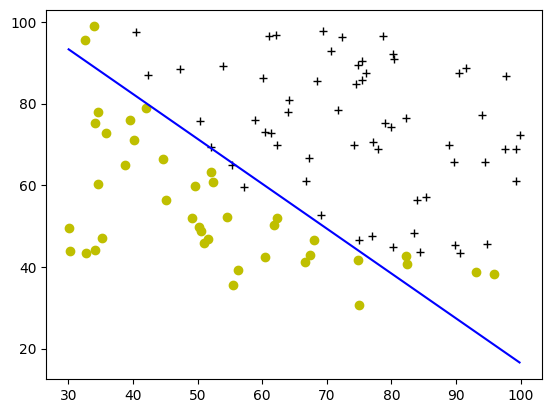

In [41]:
plot_decision_boundary(w, b, X_train, y_train)

<a name="2.8"></a>
### 2.8 Evaluating logistic regression

학습된 모델이 훈련 세트를 얼마나 잘 예측하는지 확인하여 찾은 매개변수의 품질을 평가할 수 있습니다.

이를 위해 아래의 `predict` 함수를 구현합니다.


<a name='ex-04'></a>
### Exercise 4

데이터세트와 학습된 매개변수 벡터 $w$ 및 $b$를 기준으로 `1` 또는 `0` 예측을 생성하려면 `predict` 함수을 완료하세요.

- 먼저 모든 예에 대해 모델 $f(x^{(i)}) = g(w \cdot x^{(i)})$에서 예측을 계산해야 합니다.
     - 이전에 위 부분에서 이를 구현한 적이 있습니다.
- 모델 ($f(x^{(i)})$)의 출력을 $x^{(i)}$가 주어지고 다음과 같이 매개변수화된 $y^{(i)}=1$일 확률로 해석합니다. $w$.
- 따라서 로지스틱 회귀 모델에서 최종 예측($y^{(i)}=0$ 또는 $y^{(i)}=1$)을 얻으려면 다음 휴리스틱을 사용할 수 있습니다.

   $f(x^{(i)}) >= 0.5$인 경우 $y^{(i)}=1$를 예측합니다.
  
   $f(x^{(i)}) < 0.5$인 경우 $y^{(i)}=0$를 예측합니다.
    
문제가 발생하면 아래 셀 뒤에 표시되는 힌트를 확인하여 구현에 도움을 받을 수 있습니다.

In [42]:
# UNQ_C4
# GRADED FUNCTION: predict

def predict(X, w, b): 
    """
    Predict whether the label is 0 or 1 using learned logistic
    regression parameters w
    
    Args:
    X : (ndarray Shape (m, n))
    w : (array_like Shape (n,))      Parameters of the model
    b : (scalar, float)              Parameter of the model

    Returns:
    p: (ndarray (m,1))
        The predictions for X using a threshold at 0.5
    """
    # number of training examples
    m, n = X.shape   
    p = np.zeros(m)
   
    ### START CODE HERE ### 
     # Loop over each example
    for i in range(m):   
        z_wb = np.dot(X[i],w) 
        # Loop over each feature
        for j in range(n): 
            # Add the corresponding term to z_wb
            z_wb += 0
        
        # Add bias term 
        z_wb += b
        
        # Calculate the prediction for this example
        f_wb = sigmoid(z_wb)

        # Apply the threshold
        p[i] = 1 if f_wb>0.5 else 0    
    ### END CODE HERE ### 
    return p

<details>
  <summary><font size="3" color="darkgreen"><b>Click for hints</b></font></summary>
    
    
* 이 함수의 전체 구현을 구성하는 방법은 다음과 같습니다.
    ```python 
       def predict(X, w, b): 
            # number of training examples
            m, n = X.shape   
            p = np.zeros(m)
   
            ### START CODE HERE ### 
            # Loop over each example
            for i in range(m):   
                
                # Calculate f_wb (exactly how you did it in the compute_cost function above) 
                # using a couple of lines of code
                f_wb = 

                # Calculate the prediction for that training example 
                p[i] = # Your code here to calculate the prediction based on f_wb
        
            ### END CODE HERE ### 
            return p
    ```
  
    여전히 문제가 해결되지 않으면 아래에 제시된 힌트를 확인하여 `f_wb` 및 `p[i]` 계산 방법을 알아보세요.
       
    <details>
          <summary><font size="2" color="darkblue"><b>Hint to calculate f_wb</b></font></summary>
           &emsp; &emsp; 위의 <code>compute_cost</code>에서 f_wb를 계산했음을 기억하세요. 각 중간항을 계산하는 방법에 대한 자세한 힌트는 해당 연습 문제 아래의 힌트 섹션을 확인하세요.
           <details>
              <summary><font size="2" color="blue"><b>&emsp; &emsp; More hints to calculate f_wb</b></font></summary>
              &emsp; &emsp; You can calculate f_wb as
               <pre>
               for i in range(m):   
                   # Calculate f_wb (exactly how you did it in the compute_cost function above)
                   z_wb = 0
                   # Loop over each feature
                   for j in range(n): 
                       # Add the corresponding term to z_wb
                       z_wb_ij = X[i, j] * w[j]
                       z_wb += z_wb_ij
            
                   # Add bias term 
                   z_wb += b
        
                   # Calculate the prediction from the model
                   f_wb = sigmoid(z_wb)
    </details>
        
    </details>
    <details>
          <summary><font size="2" color="darkblue"><b>Hint to calculate p[i]</b></font></summary>
           &emsp; &emsp; 예를 들어, y가 3보다 작으면 x = 1이고 그렇지 않으면 0이라고 말하고 싶다면 코드에서 <code>x = y < 3 </code>로 표현할 수 있습니다. 이제 f_wb >= 0.5이면 p[i] = 1이고 그렇지 않으면 0에 대해 동일한 작업을 수행합니다.
                   <details>
              <summary><font size="2" color="blue"><b>&emsp; &emsp; More hints to calculate p[i]</b></font></summary>
              &emsp; &emsp; p[i]를 <code>p[i] = f_wb >= 0.5</code>로 계산할 수 있습니다.
          </details>
    </details>

</details>

`predict` 함수를 완료한 후 아래 코드를 실행하여 올바른 예의 비율을 계산하여 분류기의 훈련 정확도를 보고해 보겠습니다.

In [43]:
# Test your predict code
np.random.seed(1)
tmp_w = np.random.randn(2)
tmp_b = 0.3    
tmp_X = np.random.randn(4, 2) - 0.5

tmp_p = predict(tmp_X, tmp_w, tmp_b)
print(f'Output of predict: shape {tmp_p.shape}, value {tmp_p}')

# UNIT TESTS        
predict_test(predict)

Output of predict: shape (4,), value [0. 1. 1. 1.]
All tests passed!


**Expected output** 

<table>
  <tr>
    <td> <b>Output of predict: shape (4,),value [0. 1. 1. 1.]<b></td>
  </tr>
</table>

이제 이것을 사용하여 훈련 세트의 정확도를 계산해 보겠습니다.

In [44]:
#Compute accuracy on our training set
p = predict(X_train, w,b)
print('Train Accuracy: %f'%(np.mean(p == y_train) * 100))

Train Accuracy: 92.000000


<table>
  <tr>
    <td> <b>Train Accuracy (approx):<b></td>
    <td> 92.00 </td> 
  </tr>
</table>

<a name="3"></a>
## 3 - Regularized Logistic Regression

이 연습 부분에서는 제조 공장의 마이크로칩이 품질 보증(quality assurance (QA))을 통과하는지 예측하기 위해 정규화된 로지스틱 회귀를 구현합니다. QA 중에 각 마이크로칩은 다양한 테스트를 거쳐 올바르게 작동하는지 확인합니다.

<a name="3.1"></a>
### 3.1 Problem Statement

당신이 공장의 제품 관리자이고 두 가지 다른 테스트에서 일부 마이크로칩에 대한 테스트 결과를 가지고 있다고 가정합니다.
- 이 두 가지 테스트를 통해 마이크로칩이 승인되어야 하는지 거부되어야 하는지 결정하고 싶습니다.
- 결정을 내리는 데 도움이 되도록 과거 마이크로칩에 대한 테스트 결과 데이터 세트가 있으며, 이 데이터에서 로지스틱 회귀 모델을 구축할 수 있습니다.

<a name="3.2"></a>
### 3.2 Loading and visualizing the data

이 연습의 이전 부분과 유사하게 이 작업에 대한 데이터세트를 로드하고 시각화하는 것부터 시작해 보겠습니다.

- 아래 표시된 `load_dataset()` 함수는 데이터를 `X_train` 및 `y_train` 변수에 로드합니다.
   - `X_train`에는 두 가지 테스트의 마이크로칩 테스트 결과가 포함되어 있습니다.
   - `y_train`에는 QA 결과가 포함됩니다.
       - 마이크로칩이 승인된 경우 `y_train = 1`
       - 마이크로칩이 거부된 경우 `y_train = 0`
   - `X_train`과 `y_train`은 모두 numpy 배열입니다.

In [ ]:
# load dataset
X_train, y_train = load_data("data/ex2data2.txt")

#### View the variables

아래 코드는 `X_train`과 `y_train`의 처음 5개 값과 변수 유형을 인쇄합니다.

In [ ]:
# print X_train
print("X_train:", X_train[:5])
print("Type of X_train:",type(X_train))

# print y_train
print("y_train:", y_train[:5])
print("Type of y_train:",type(y_train))

X_train: [[ 0.051267  0.69956 ]
 [-0.092742  0.68494 ]
 [-0.21371   0.69225 ]
 [-0.375     0.50219 ]
 [-0.51325   0.46564 ]]
Type of X_train: <class 'numpy.ndarray'>
y_train: [1. 1. 1. 1. 1.]
Type of y_train: <class 'numpy.ndarray'>


#### Check the dimensions of your variables

데이터에 익숙해지는 또 다른 유용한 방법은 해당 차원을 보는 것입니다. `X_train` 과  `y_train` 의 모양을 프린트하고 데이터 세트에 얼마나 많은 훈련 예제가 있는지 살펴보겠습니다.

In [ ]:
print ('The shape of X_train is: ' + str(X_train.shape))
print ('The shape of y_train is: ' + str(y_train.shape))
print ('We have m = %d training examples' % (len(y_train)))

The shape of X_train is: (118, 2)
The shape of y_train is: (118,)
We have m = 118 training examples


#### Visualize your data

도우미 함수 `plot_data`(`utils.py`에서)는 그림 3과 같은 그림을 생성하는 데 사용됩니다. 여기서 축은 두 개의 테스트 점수이고 양수(y = 1, 허용) 및 음수(y = 0, 거부됨) 예는 다른 마커로 표시됩니다.

<img src="images/figure 3.png"  width="450" height="450">

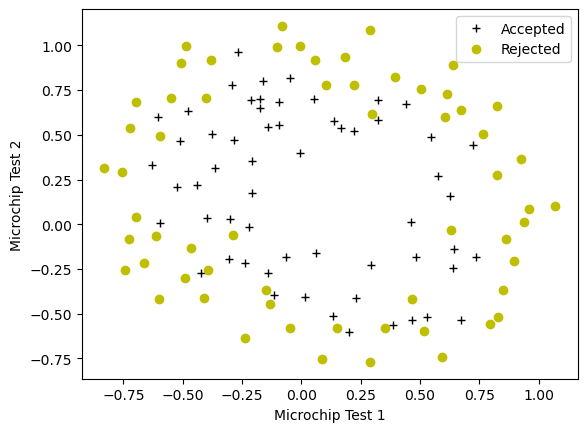

In [ ]:
# Plot examples
plot_data(X_train, y_train[:], pos_label="Accepted", neg_label="Rejected")

# Set the y-axis label
plt.ylabel('Microchip Test 2') 
# Set the x-axis label
plt.xlabel('Microchip Test 1') 
plt.legend(loc="upper right")
plt.show()

그림 3은 우리의 데이터 세트가 플롯을 통해 직선으로 긍정적인 사례와 부정적인 사례로 분리될 수 없음을 보여줍니다. 따라서 로지스틱 회귀는 선형 결정 경계만 찾을 수 있으므로 로지스틱 회귀의 간단한 적용은 이 데이터 세트에서 잘 수행되지 않습니다.

<a name="3.3"></a>
### 3.3 Feature mapping

데이터를 더 잘 맞추는 한 가지 방법은 각 데이터 포인트에서 더 많은 특징을 만드는 것입니다. 제공된 함수 `map_feature`에서 $x_1$ 및 $x_2$의 모든 다항식 항에 최대 6제곱까지 특징을 매핑합니다.

$$\mathrm{map\_feature}(x) = 
\left[\begin{array}{c}
x_1\\
x_2\\
x_1^2\\
x_1 x_2\\
x_2^2\\
x_1^3\\
\vdots\\
x_1 x_2^5\\
x_2^6\end{array}\right]$$

이 매핑의 결과로 두 가지 특징의 벡터(두 가지 QA 테스트의 점수)가 27차원 벡터로 변환되었습니다.

- 이 고차원 특징 벡터에 대해 훈련된 로지스틱 회귀 분류기는 더 복잡한 결정 경계를 가지며 2차원 플롯에 그려질 때 비선형이 됩니다.
- utils.py에 `map_feature` 함수를 제공했습니다.

In [ ]:
print("Original shape of data:", X_train.shape)

mapped_X =  map_feature(X_train[:, 0], X_train[:, 1])
print("Shape after feature mapping:", mapped_X.shape)

Original shape of data: (118, 2)
Shape after feature mapping: (118, 27)


변환을 보기 위해 `X_train`과 `mapped`의 첫 번째 요소도 인쇄해 보겠습니다.

In [ ]:
print("X_train[0]:", X_train[0])
print("mapped X_train[0]:", mapped_X[0])

X_train[0]: [0.051267 0.69956 ]
mapped X_train[0]: [5.12670000e-02 6.99560000e-01 2.62830529e-03 3.58643425e-02
 4.89384194e-01 1.34745327e-04 1.83865725e-03 2.50892595e-02
 3.42353606e-01 6.90798869e-06 9.42624411e-05 1.28625106e-03
 1.75514423e-02 2.39496889e-01 3.54151856e-07 4.83255257e-06
 6.59422333e-05 8.99809795e-04 1.22782870e-02 1.67542444e-01
 1.81563032e-08 2.47750473e-07 3.38066048e-06 4.61305487e-05
 6.29470940e-04 8.58939846e-03 1.17205992e-01]


특징 매핑을 사용하면 보다 표현력이 뛰어난 분류기를 구축할 수 있지만 과적합에 더 취약합니다. 연습의 다음 부분에서는 정규화된 로지스틱 회귀를 구현하여 데이터를 맞추고 정규화가 과적합 문제를 해결하는 데 어떻게 도움이 되는지 직접 확인합니다.

<a name="3.4"></a>
### 3.4 Cost function for regularized logistic regression

이 부분에서는 정규화된 로지스틱 회귀에 대한 비용 함수를 구현합니다.

정규화된 로지스틱 회귀의 경우 비용 함수의 형태는 다음과 같습니다.
$$J(\mathbf{w},b) = \frac{1}{m}  \sum_{i=0}^{m-1} \left[ -y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \right] + \frac{\lambda}{2m}  \sum_{j=0}^{n-1} w_j^2$$

(위에서 구현한) 이것을 정규화가 적용되지 않은 다음과 같은 형태의 비용 함수와 비교해 보세요. 

$$ J(\mathbf{w}.b) = \frac{1}{m}\sum_{i=0}^{m-1} \left[ (-y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right)\right]$$

차이점은 $$\frac{\lambda}{2m} \sum_{j=0}^{n-1} w_j^2$$인 정규화 항입니다.
$b$ 매개변수는 정규화되지 않습니다.

<a name='ex-05'></a>
### Exercise 5

$w$의 각 요소에 대해 다음 항을 계산하려면 아래 `compute_cost_reg` 함수를 완료하세요.
$$\frac{\lambda}{2m} \sum_{j=0}^{n-1} w_j^2$$

그런 다음 시작 코드는 이를 정규화 없는 비용(위의 `compute_cost`에서 계산함)에 추가하여 정규화가 포함된 비용을 계산합니다.

문제가 발생하면 아래 셀 뒤에 표시되는 힌트를 확인하여 구현에 도움을 받을 수 있습니다.


In [45]:
# UNQ_C5
def compute_cost_reg(X, y, w, b, lambda_ = 1):
    """
    Computes the cost over all examples
    Args:
      X : (array_like Shape (m,n)) data, m examples by n features
      y : (array_like Shape (m,)) target value 
      w : (array_like Shape (n,)) Values of parameters of the model      
      b : (array_like Shape (n,)) Values of bias parameter of the model
      lambda_ : (scalar, float)    Controls amount of regularization
    Returns:
      total_cost: (scalar)         cost 
    """

    m, n = X.shape
    
    # Calls the compute_cost function that you implemented above
    cost_without_reg = compute_cost(X, y, w, b) 
    
    # You need to calculate this value
    reg_cost = 0.
    
    ### START CODE HERE ###
    reg_cost = sum(np.square(w))
    ### END CODE HERE ### 
    
    # Add the regularization cost to get the total cost
    total_cost = cost_without_reg + (lambda_/(2 * m)) * reg_cost

    return total_cost

<details>
  <summary><font size="3" color="darkgreen"><b>Click for hints</b></font></summary>
    
    
* 이 함수의 전체 구현을 구성하는 방법은 다음과 같습니다.
    ```python 
       def compute_cost_reg(X, y, w, b, lambda_ = 1):
   
           m, n = X.shape
    
            # Calls the compute_cost function that you implemented above
            cost_without_reg = compute_cost(X, y, w, b) 
    
            # You need to calculate this value
            reg_cost = 0.
    
            ### START CODE HERE ###
            for j in range(n):
                reg_cost_j = # Your code here to calculate the cost from w[j]
                reg_cost = reg_cost + reg_cost_j

            ### END CODE HERE ### 
    
            # Add the regularization cost to get the total cost
            total_cost = cost_without_reg + (lambda_/(2 * m)) * reg_cost

        return total_cost
    ```
  
    그래도 문제가 해결되지 않으면 아래에 제시된 힌트를 확인하여 `reg_cost_j` 계산 방법을 알아보세요.
    
    <details>
          <summary><font size="2" color="darkblue"><b>Hint to calculate reg_cost_j</b></font></summary>
           &emsp; &emsp; reg_cost_j 계산을 <code>reg_cost_j = w[j]**2 </code>처럼 할 수 있습니다.
    </details>
        
    </details>

</details>

    

아래 셀을 실행하여 `compute_cost_reg` 함수 구현을 확인하세요.

In [46]:
X_mapped = map_feature(X_train[:, 0], X_train[:, 1])
np.random.seed(1)
initial_w = np.random.rand(X_mapped.shape[1]) - 0.5
initial_b = 0.5
lambda_ = 0.5
cost = compute_cost_reg(X_mapped, y_train, initial_w, initial_b, lambda_)

print("Regularized cost :", cost)

# UNIT TEST    
compute_cost_reg_test(compute_cost_reg)


Regularized cost : nan
All tests passed!


C:\Users\sdh05\AppData\Local\Temp\ipykernel_24816\1300448355.py:17: RuntimeWarning: overflow encountered in exp
  g=1/(1+np.exp(-z))
C:\Users\sdh05\AppData\Local\Temp\ipykernel_24816\3715803360.py:23: RuntimeWarning: divide by zero encountered in log
  cost += -y[i]*np.log(f_wb) - (1-y[i])*np.log(1-f_wb)
C:\Users\sdh05\AppData\Local\Temp\ipykernel_24816\3715803360.py:23: RuntimeWarning: invalid value encountered in scalar multiply
  cost += -y[i]*np.log(f_wb) - (1-y[i])*np.log(1-f_wb)


**Expected Output**:
<table>
  <tr>
    <td> <b>Regularized cost : <b></td>
    <td> 0.6618252552483948 </td> 
  </tr>
</table>

<a name="3.5"></a>
### 3.5 Gradient for regularized logistic regression

이 섹션에서는 정규화된 로지스틱 회귀에 대한 그라디언트를 구현합니다.


정규화된 비용 함수의 그라디언트에는 두 가지 구성 요소가 있습니다. 첫 번째 $\frac{\partial J(\mathbf{w},b)}{\partial b}$는 스칼라이고, 다른 하나는 매개변수 $\mathbf{w}$와 모양이 동일한 벡터입니다. 여기서 $j^\mathrm{th}$ 요소는 다음과 같이 정의됩니다.:

$$\frac{\partial J(\mathbf{w},b)}{\partial b} = \frac{1}{m}  \sum_{i=0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})  $$

$$\frac{\partial J(\mathbf{w},b)}{\partial w_j} = \left( \frac{1}{m}  \sum_{i=0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) x_j^{(i)} \right) + \frac{\lambda}{m} w_j  \quad\, \mbox{for $j=0...(n-1)$}$$

이것을 정규화 없는(위에서 구현한) 비용 함수의 그라디언트와 비교하세요. 이는 다음과 같습니다.

$$
\frac{\partial J(\mathbf{w},b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - \mathbf{y}^{(i)}) \tag{2}
$$
$$
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - \mathbf{y}^{(i)})x_{j}^{(i)} \tag{3}
$$


보시다시피 $\frac{\partial J(\mathbf{w},b)}{\partial b}$는 동일하며 차이점은 $\frac{\partial J(\mathbf{w},b)}{\partial w}$의 다음과 같은 항이며, 즉 $$\frac{\lambda}{m} w_j  \quad\, \mbox{for $j=0...(n-1)$}$$ 입니다.


<a name='ex-06'></a>
### Exercise 6

다음 항을 계산하려면 아래 코드를 수정하려면 아래 `compute_gradient_reg` 함수를 완료하세요.

$$\frac{\lambda}{m} w_j \quad\, \mbox{for $j=0...(n-1)$}$$

시작 코드는 정규화된 비용 함수에 대한 그라디언트를 얻기 위해 위의 `compute_gradient`에서 반환된 $\frac{\partial J(\mathbf{w},b)}{\partial w}$에 이 항을 추가합니다.

문제가 발생하면 아래 셀 뒤에 표시되는 힌트를 확인하여 구현에 도움을 받을 수 있습니다.

In [47]:
# UNQ_C6
def compute_gradient_reg(X, y, w, b, lambda_ = 1): 
    """
    Computes the gradient for linear regression 
 
    Args:
      X : (ndarray Shape (m,n))   variable such as house size 
      y : (ndarray Shape (m,))    actual value 
      w : (ndarray Shape (n,))    values of parameters of the model      
      b : (scalar)                value of parameter of the model  
      lambda_ : (scalar,float)    regularization constant
    Returns
      dj_db: (scalar)             The gradient of the cost w.r.t. the parameter b. 
      dj_dw: (ndarray Shape (n,)) The gradient of the cost w.r.t. the parameters w. 

    """
    m, n = X.shape
    
    dj_db, dj_dw = compute_gradient(X, y, w, b)

    ### START CODE HERE ###     

    for j in range(n):
        dj_dw[j] = dj_dw[j] + (lambda_/m) * w[j]
    
    ### END CODE HERE ###         
        
    return dj_db, dj_dw

<details>
  <summary><font size="3" color="darkgreen"><b>Click for hints</b></font></summary>
    
    
* 이 함수의 전체 구현을 구성하는 방법은 다음과 같습니다.
    ```python 
    def compute_gradient_reg(X, y, w, b, lambda_ = 1): 
        m, n = X.shape
    
        dj_db, dj_dw = compute_gradient(X, y, w, b)

        ### START CODE HERE ###     
        # Loop over the elements of w
        for j in range(n): 
            
            dj_dw_j_reg = # Your code here to calculate the regularization term for dj_dw[j]
            
            # Add the regularization term  to the correspoding element of dj_dw
            dj_dw[j] = dj_dw[j] + dj_dw_j_reg
        
        ### END CODE HERE ###         
        
        return dj_db, dj_dw
    ```
  
    여전히 문제가 있는 경우 아래 제시된 힌트를 확인하여 `dj_dw_j_reg` 계산 방법을 알아보세요.
    
    <details>
          <summary><font size="2" color="darkblue"><b>Hint to calculate dj_dw_j_reg</b></font></summary>
           &emsp; &emsp; dj_dw_j_reg 계산을 <code>dj_dw_j_reg = (lambda_ / m) * w[j] </code>로 사용할 수 있습니다.
    </details>
        
    </details>

</details>

    


아래 셀을 실행하여 `compute_gradient_reg` 함수 구현을 확인하세요.

In [48]:
X_mapped = map_feature(X_train[:, 0], X_train[:, 1])
np.random.seed(1) 
initial_w  = np.random.rand(X_mapped.shape[1]) - 0.5 
initial_b = 0.5
 
lambda_ = 0.5
dj_db, dj_dw = compute_gradient_reg(X_mapped, y_train, initial_w, initial_b, lambda_)

print(f"dj_db: {dj_db}", )
print(f"First few elements of regularized dj_dw:\n {dj_dw[:4].tolist()}", )

# UNIT TESTS    
compute_gradient_reg_test(compute_gradient_reg)


dj_db: 0.28
First few elements of regularized dj_dw:
 [16.237444240683217, 12.047326628088538, 1026.397204362715, 696.2311299647832]
All tests passed!


C:\Users\sdh05\AppData\Local\Temp\ipykernel_24816\1300448355.py:17: RuntimeWarning: overflow encountered in exp
  g=1/(1+np.exp(-z))


**Expected Output**:
<table>
  <tr>
    <td> <b>dj_db:</b>0.07138288792343656</td> </tr>
  <tr>
      <td> <b> First few elements of regularized dj_dw:</b> </td> </tr>
   <tr>
   <td> [[-0.010386028450548701], [0.01140985288328012], [0.0536273463274574], [0.003140278267313462]] </td> 
  </tr>
</table>

<a name="3.6"></a>
### 3.6 Learning parameters using gradient descent

이전 부분과 유사하게 위에서 구현한 경사하강법 함수를 사용하여 최적 매개변수 $w$,$b$를 학습합니다.
- 정규화된 로지스틱 회귀에 대한 비용 및 기울기를 올바르게 완료한 경우 다음 셀을 통해 $w$ 매개변수를 학습할 수 있어야 합니다.
- 매개변수를 훈련한 후 이를 사용하여 결정 경계를 표시합니다.

**메모**

아래 코드 블록은 실행하는 데 꽤 오랜 시간이 걸립니다. 특히 벡터화되지 않은 버전의 경우 더욱 그렇습니다. `iterations`을 줄여 구현을 테스트하고 더 빠르게 반복할 수 있습니다. 시간이 있다면 100,000번의 반복을 실행하여 더 나은 결과를 확인하세요.

In [49]:
# Initialize fitting parameters
np.random.seed(1)
initial_w = np.random.rand(X_mapped.shape[1])-0.5
initial_b = 1.

# Set regularization parameter lambda_ to 1 (you can try varying this)
lambda_ = 0.01;                                          
# Some gradient descent settings
iterations = 10000
alpha = 0.01

w,b, J_history,_ = gradient_descent(X_mapped, y_train, initial_w, initial_b, 
                                    compute_cost_reg, compute_gradient_reg, 
                                    alpha, iterations, lambda_)

C:\Users\sdh05\AppData\Local\Temp\ipykernel_24816\1300448355.py:17: RuntimeWarning: overflow encountered in exp
  g=1/(1+np.exp(-z))
C:\Users\sdh05\AppData\Local\Temp\ipykernel_24816\3715803360.py:23: RuntimeWarning: divide by zero encountered in log
  cost += -y[i]*np.log(f_wb) - (1-y[i])*np.log(1-f_wb)
C:\Users\sdh05\AppData\Local\Temp\ipykernel_24816\3715803360.py:23: RuntimeWarning: invalid value encountered in scalar multiply
  cost += -y[i]*np.log(f_wb) - (1-y[i])*np.log(1-f_wb)


Iteration    0: Cost      nan   


Iteration 1000: Cost      nan   
Iteration 2000: Cost      nan   
Iteration 3000: Cost      nan   
Iteration 4000: Cost      nan   


<details>
<summary>
    <b>Expected Output: Cost < 0.5  (Click for details)</b>
</summary>

```
# Using the following settings
#np.random.seed(1)
#initial_w = np.random.rand(X_mapped.shape[1])-0.5
#initial_b = 1.
#lambda_ = 0.01;                                          
#iterations = 10000
#alpha = 0.01
Iteration    0: Cost     0.72   
Iteration 1000: Cost     0.59   
Iteration 2000: Cost     0.56   
Iteration 3000: Cost     0.53   
Iteration 4000: Cost     0.51   
Iteration 5000: Cost     0.50   
Iteration 6000: Cost     0.48   
Iteration 7000: Cost     0.47   
Iteration 8000: Cost     0.46   
Iteration 9000: Cost     0.45   
Iteration 9999: Cost     0.45       
    
```

<a name="3.7"></a>
### 3.7 Plotting the decision boundary
To help you visualize the model learned by this classifier, we will use our `plot_decision_boundary` function which plots the (non-linear) decision boundary that separates the positive and negative examples. 

- In the function, we plotted the non-linear decision boundary by computing the classifier’s predictions on an evenly spaced grid and then drew a contour plot of where the predictions change from y = 0 to y = 1.

- After learning the parameters $w$,$b$, the next step is to plot a decision boundary similar to Figure 4.

<img src="images/figure 4.png"  width="450" height="450">

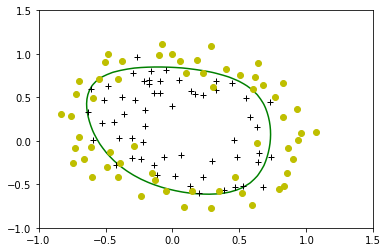

In [ ]:
plot_decision_boundary(w, b, X_mapped, y_train)

<a name="3.8"></a>
### 3.8 Evaluating regularized logistic regression model

위에서 구현한 `predict` 함수를 사용하여 훈련 세트에 대한 정규화된 로지스틱 회귀 모델의 정확도를 계산합니다.

In [ ]:
#Compute accuracy on the training set
p = predict(X_mapped, w, b)

print('Train Accuracy: %f'%(np.mean(p == y_train) * 100))

Train Accuracy: 82.203390


**Expected Output**:
<table>
  <tr>
    <td> <b>Train Accuracy:</b>~ 80%</td> </tr>
</table>